In [37]:
import numpy as np
from os.path import join as pjoin
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../../style.mcstyle')   # noqa

# Quijote (old checks)

Compare the distributions of halo masses, positions and velocities from Quijote to those obtained using `rho_to_halo` with BORG-LPT

FileNotFoundError: [Errno 2] No such file or directory: '/anvil/scratch/x-mho1/cmass-ili/quijotelike/fastpm/L1000-N128/136/halo_pos.npy'

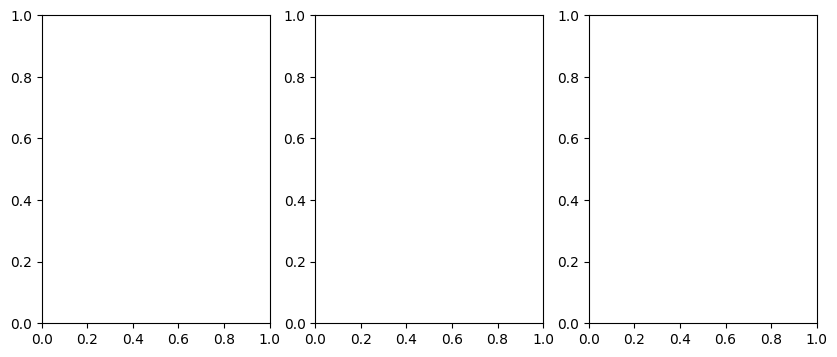

In [ ]:
cmass_dir = '/anvil/scratch/x-mho1/cmass-ili/quijotelike/fastpm/L1000-N128/136'
quijote_dir = '/anvil/scratch/x-mho1/quijote/Halos/latin_hypercube_HR/9/'

hist_kwargs = {'density': True, 'histtype': 'step', 'bins': 30}

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
x_cmass = np.load(pjoin(cmass_dir, 'halo_pos.npy'))
x_quijote = np.load(pjoin(quijote_dir, 'halo_pos.npy'))
for i in range(3):
    axs[i].hist(x_cmass[:, i], label='rho_to_halo', **hist_kwargs)
    axs[i].hist(x_quijote[:, i], label='Quijote', **hist_kwargs)
    axs[i].legend()
axs[0].set_xlabel(r'$x \ / \ {\rm Mpc}/h$')
axs[1].set_xlabel(r'$y \ / \ {\rm Mpc}/h$')
axs[2].set_xlabel(r'$z \ / \ {\rm Mpc}/h$')
axs[1].set_title('Positions')
fig.tight_layout()

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
v_cmass = np.load(pjoin(cmass_dir, 'halo_vel.npy'))
v_quijote = np.load(pjoin(quijote_dir, 'halo_vel.npy'))
for i in range(3):
    axs[i].hist(v_cmass[:, i], label='rho_to_halo', **hist_kwargs)
    axs[i].hist(v_quijote[:, i], label='Quijote', **hist_kwargs)
    axs[i].legend(loc='upper right')
axs[0].set_xlabel(r'$v_x \ / \ {\rm km \, s^{-1}}$')
axs[1].set_xlabel(r'$v_y \ / \ {\rm km \, s^{-1}}$')
axs[2].set_xlabel(r'$v_z \ / \ {\rm km \, s^{-1}}$')
axs[1].set_title('Velocities')
fig.tight_layout()
print('rho_to_halo velocity std:', v_cmass.std())
print('quijote velocity std:', v_quijote.std())
print('ratio:', v_quijote.std() / v_cmass.std())

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
m_cmass = np.load(pjoin(cmass_dir, 'halo_mass.npy'))
m_quijote = np.load(pjoin(quijote_dir, 'halo_mass.npy'))
ax.hist(m_cmass, label='rho_to_halo', **hist_kwargs)
ax.hist(m_quijote, label='Quijote (all)', **hist_kwargs)
ax.hist(m_quijote[m_quijote > m_cmass.min()],
        label='Quijote (with mass cut)', **hist_kwargs)
ax.legend()
ax.set_title('Masses')
fig.tight_layout()

# Quijote (new checks)

In [55]:
import os
from os.path import join
from cmass.bias.apply_hod import load_snapshot
import matplotlib.pyplot as plt
import numpy as np
import h5py


def load_diag(file, a):
    a = f'{a:.6f}'
    o = {}
    with h5py.File(file, 'r') as f:
        for k, v in f[a].items():
            o[k] = np.array(v)
    return o


lhid = 663
a = 2/3

wdir = '/anvil/scratch/x-mho1/cmass-ili'

# Load [processed] Quijote rockstar
sim = 'nbody'
simpath = join(wdir, 'quijote', sim, 'L1000-N128', str(lhid))
hpos, hvel, hmass, hmeta = load_snapshot(simpath, a=a)
hdiag = load_diag(join(simpath, 'diag', 'halos.h5'), a=a)

# Load [processed] Quijote rockstar
sim = 'nbody_fof'
simpath = join(wdir, 'quijote', sim, 'L1000-N128', str(lhid))
fpos, fvel, fmass, fmeta = load_snapshot(simpath, a=a)
fdiag = load_diag(join(simpath, 'diag', 'halos.h5'), a=a)

# Load CHARM
sim = 'fastpm'
simpath = join(wdir, 'quijotelike', sim, 'L1000-N128', str(lhid))
cpos, cvel, cmass, cmeta = load_snapshot(simpath, a=a)
cdiag = load_diag(join(simpath, 'diag', 'halos.h5'), a=a)

# Load Pinocchio
sim = 'pinocchio'
simpath = join(wdir, 'quijotelike', sim, 'L1000-N512', str(lhid))
ppos, pvel, pmass, pmeta = load_snapshot(simpath, a=a)
pdiag = load_diag(join(simpath, 'diag', 'halos.h5'), a=a)

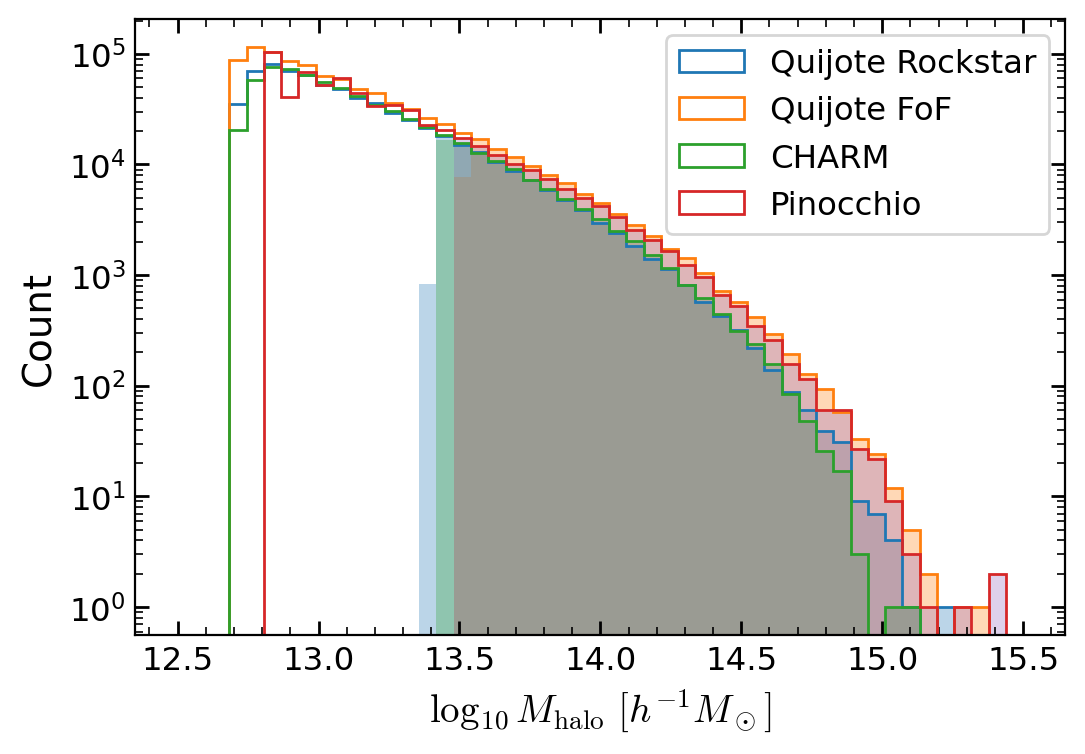

In [59]:
f, ax = plt.subplots(1, 1, figsize=(6, 4))
hbins = np.linspace(12.5, 15.5, 50)
hcen = (hbins[:-1] + hbins[1:]) / 2

ax.semilogy()
ax.hist(hmass, color='C0', bins=hbins,
        histtype='step', label='Quijote Rockstar')
ax.hist(sorted(hmass)[-int(1e5):], bins=hbins, histtype='bar',
        color='C0', alpha=0.3)
ax.hist(fmass, color='C1', bins=hbins, histtype='step', label='Quijote FoF')
ax.hist(sorted(fmass)[-int(1e5):], bins=hbins, histtype='bar',
        color='C1', alpha=0.3)
ax.hist(cmass, color='C2', bins=hbins, histtype='step', label='CHARM')
ax.hist(sorted(cmass)[-int(1e5):], bins=hbins, histtype='bar',
        color='C2', alpha=0.3)
ax.hist(pmass, color='C3', bins=hbins, histtype='step', label='Pinocchio')
ax.hist(sorted(pmass)[-int(1e5):], bins=hbins, histtype='bar',
        color='C4', alpha=0.3)
ax.set(xlabel=r'$\log_{10} M_{\rm halo} \ [h^{-1} M_\odot]$', ylabel='Count')
ax.legend()

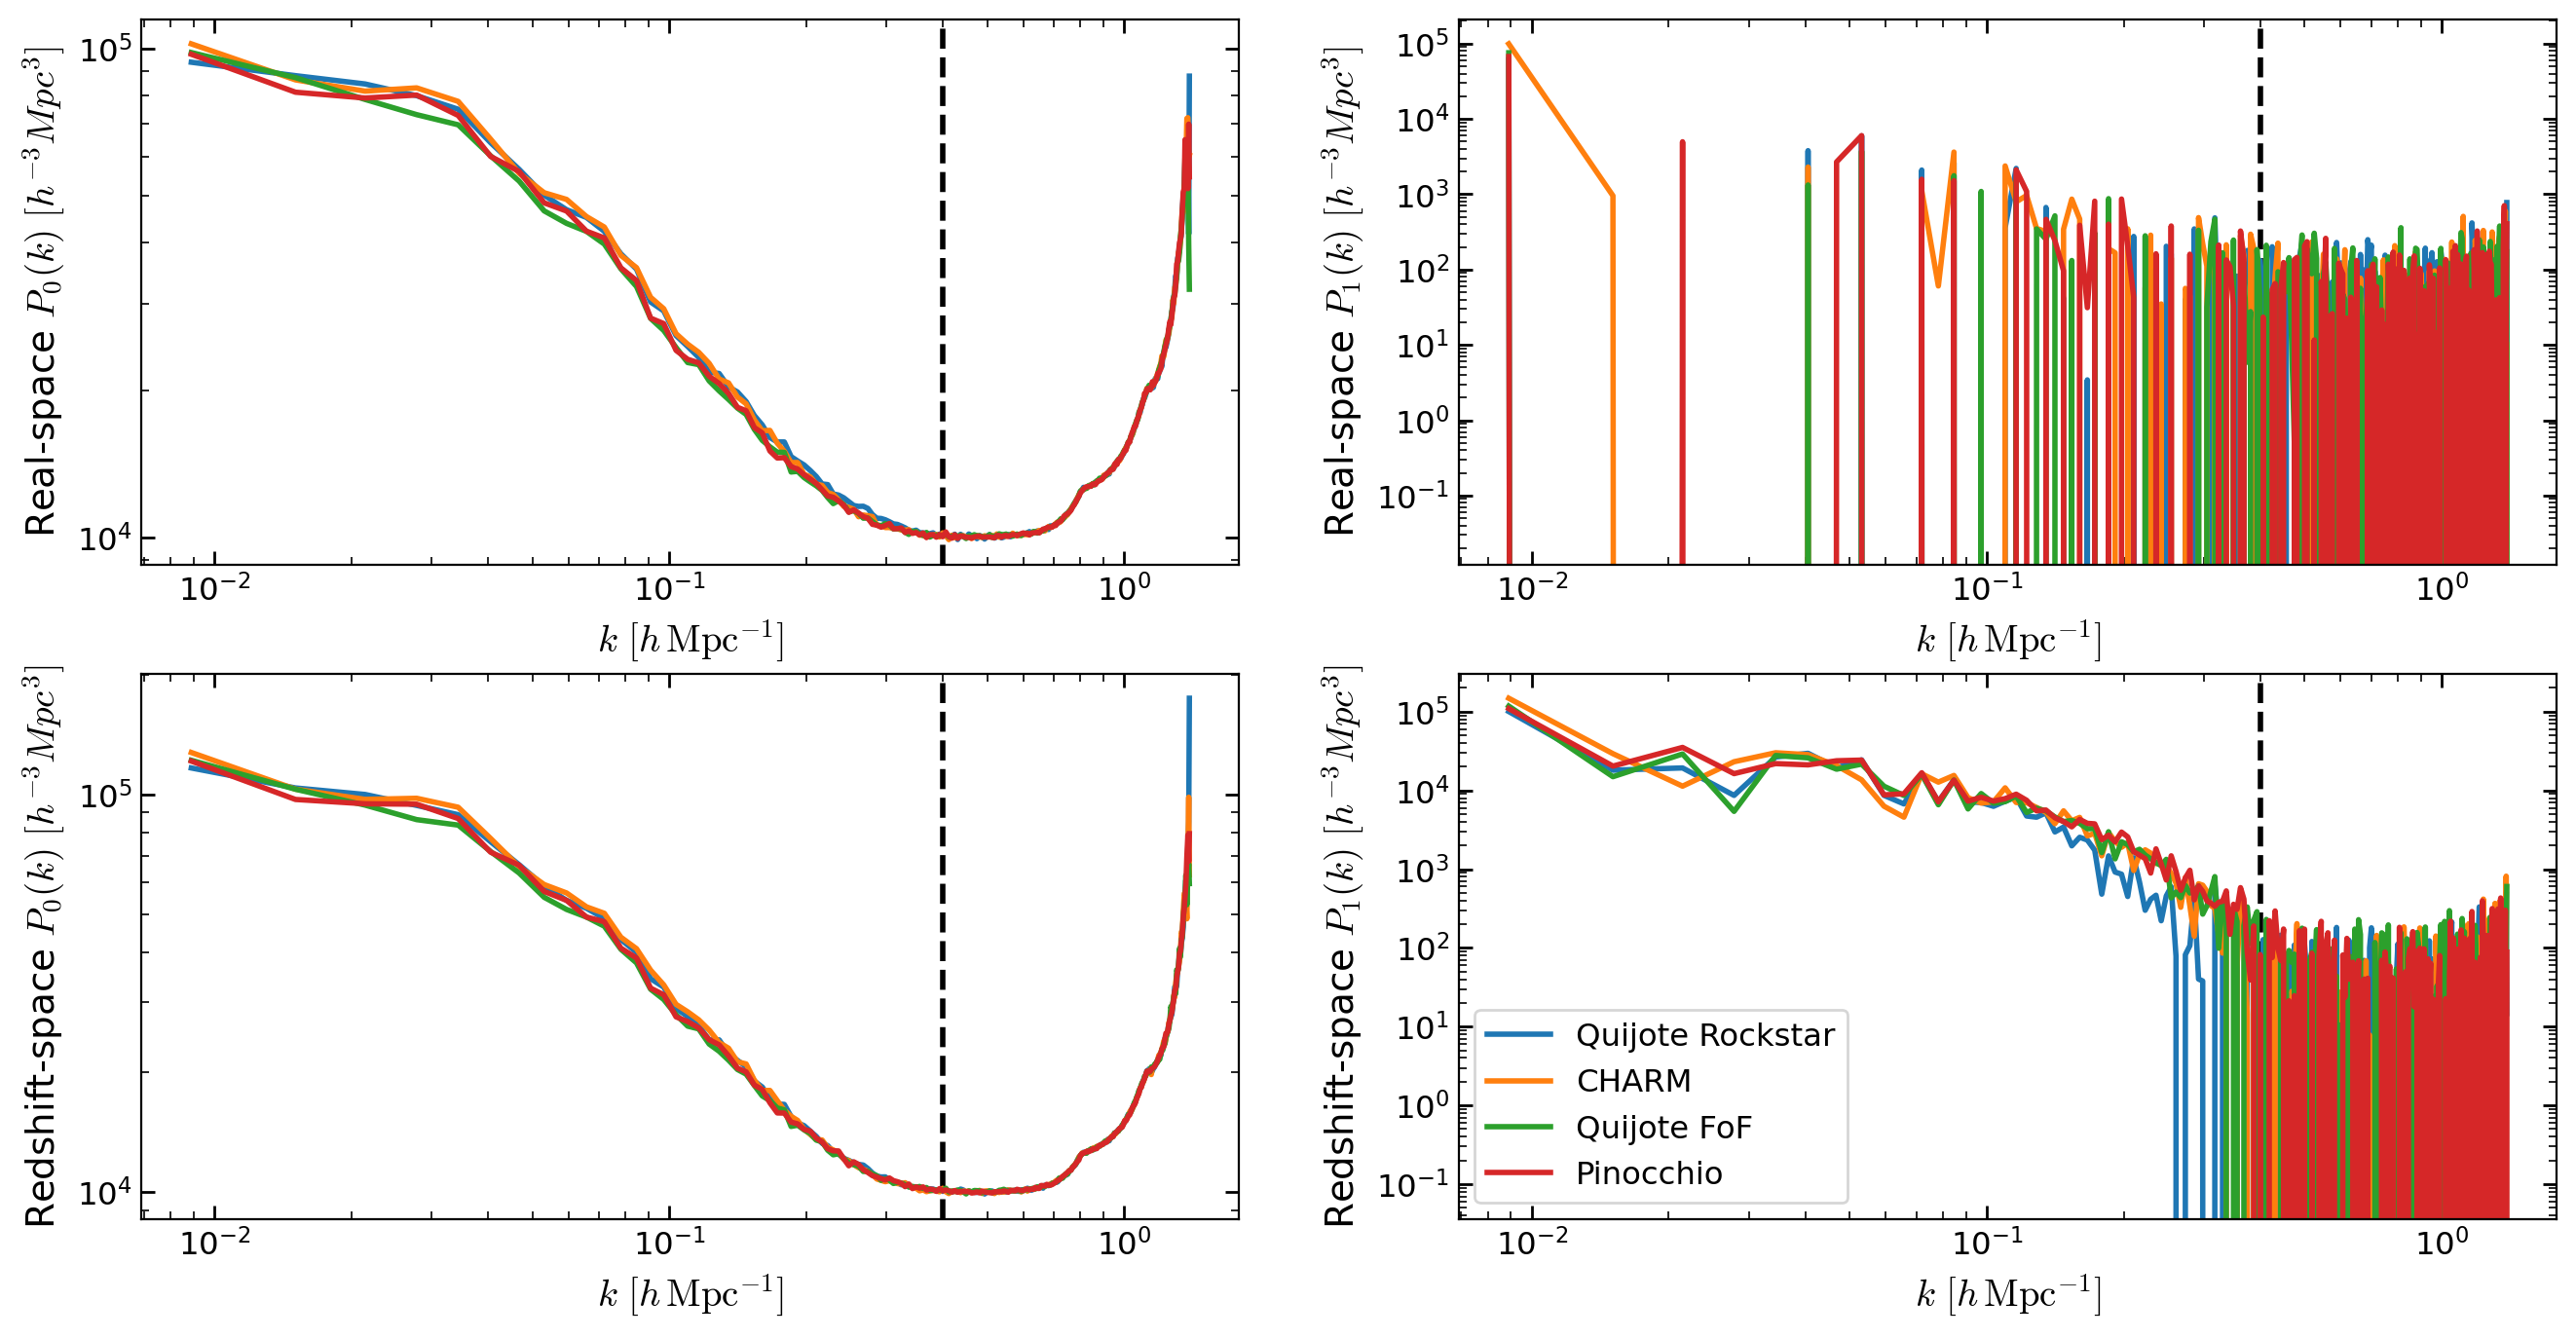

In [60]:
f, axs = plt.subplots(2, 2, figsize=(16, 8))

for i in range(2):
    ax = axs[0, i]
    ax.loglog()
    ax.axvline(0.4, c='k', ls='--')
    x, y = hdiag['Pk_k3D'], hdiag['Pk'][:, i]
    ax.plot(x, y, c='C0', label='Quijote Rockstar')
    x, y = cdiag['Pk_k3D'], cdiag['Pk'][:, i]
    ax.plot(x, y, c='C1', label='CHARM')
    x, y = fdiag['Pk_k3D'], fdiag['Pk'][:, i]
    ax.plot(x, y, c='C2', label='Quijote FoF')
    x, y = pdiag['Pk_k3D'], pdiag['Pk'][:, i]
    ax.plot(x, y, c='C3', label='Pinocchio')
    ax.set(xlabel=r'$k \ [h \, {\rm Mpc}^{-1}]$',
           ylabel=f'Real-space $P_{{{i}}}(k) \ [h^{{-3}} Mpc^3]$')

for i in range(2):
    ax = axs[1, i]
    ax.loglog()
    ax.axvline(0.4, c='k', ls='--')
    x, y = hdiag['zPk_k3D'], hdiag['zPk'][:, i]
    ax.plot(x, y, c='C0', label='Quijote Rockstar')
    x, y = cdiag['zPk_k3D'], cdiag['zPk'][:, i]
    ax.plot(x, y, c='C1', label='CHARM')
    x, y = fdiag['zPk_k3D'], fdiag['zPk'][:, i]
    ax.plot(x, y, c='C2', label='Quijote FoF')
    x, y = pdiag['zPk_k3D'], pdiag['zPk'][:, i]
    ax.plot(x, y, c='C3', label='Pinocchio')
    ax.set(xlabel=r'$k \ [h \, {\rm Mpc}^{-1}]$',
           ylabel=f'Redshift-space $P_{{{i}}}(k) \ [h^{{-3}} Mpc^3]$')

ax.legend()

# MTNG

quijote velocity std: 257.39243
MTNG velocity std: 491.70386
ratio: 1.9103276
Mmin: 12.800012


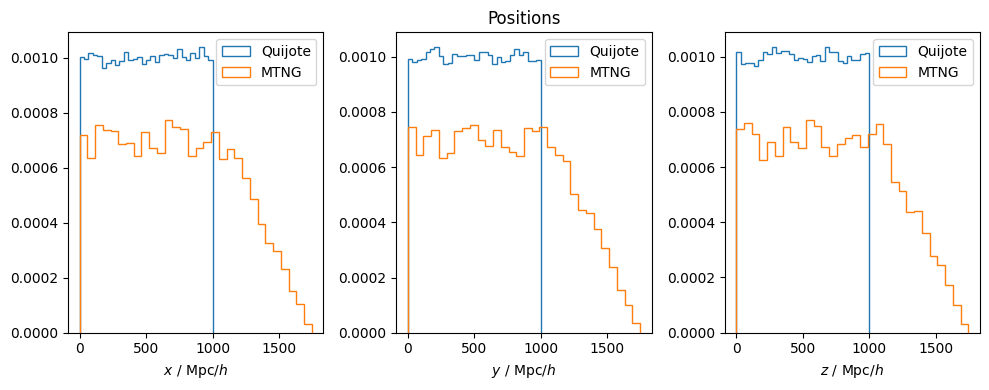

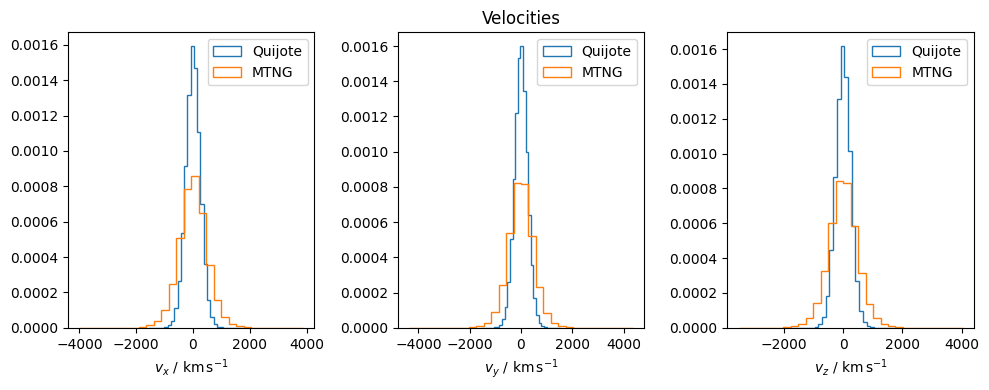

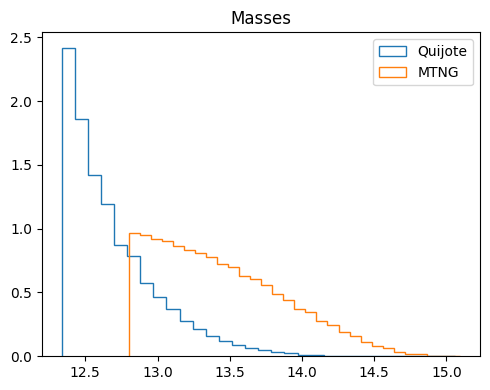

In [ ]:
quijote_dir = '/data101/bartlett/quijote/Halos/latin_hypercube_HR/9/'
mtng_dir = '/data101/bartlett/mtng/GalaxyLightconeMTNG/galaxies_lightcone_01/'

hist_kwargs = {'density': True, 'histtype': 'step', 'bins': 30}

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
x_mtng = np.load(pjoin(mtng_dir, 'halo_pos.npy'))
x_quijote = np.load(pjoin(quijote_dir, 'halo_pos.npy'))
for i in range(3):
    axs[i].hist(x_quijote[:, i], label='Quijote', **hist_kwargs)
    axs[i].hist(x_mtng[:, i], label='MTNG', **hist_kwargs)
    axs[i].legend()
axs[0].set_xlabel(r'$x \ / \ {\rm Mpc}/h$')
axs[1].set_xlabel(r'$y \ / \ {\rm Mpc}/h$')
axs[2].set_xlabel(r'$z \ / \ {\rm Mpc}/h$')
axs[1].set_title('Positions')
fig.tight_layout()

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
v_mtng = np.load(pjoin(mtng_dir, 'halo_vel.npy'))
v_quijote = np.load(pjoin(quijote_dir, 'halo_vel.npy'))
for i in range(3):
    axs[i].hist(v_quijote[:, i], label='Quijote', **hist_kwargs)
    axs[i].hist(v_mtng[:, i], label='MTNG', **hist_kwargs)
    axs[i].legend(loc='upper right')
axs[0].set_xlabel(r'$v_x \ / \ {\rm km \, s^{-1}}$')
axs[1].set_xlabel(r'$v_y \ / \ {\rm km \, s^{-1}}$')
axs[2].set_xlabel(r'$v_z \ / \ {\rm km \, s^{-1}}$')
axs[1].set_title('Velocities')
fig.tight_layout()
print('quijote velocity std:', v_quijote.std())
print('MTNG velocity std:', v_mtng.std())
print('ratio:', v_mtng.std() / v_quijote.std())

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
m_mtng = np.load(pjoin(mtng_dir, 'halo_mass.npy'))
m_quijote = np.load(pjoin(quijote_dir, 'halo_mass.npy'))
ax.hist(m_quijote, label='Quijote', **hist_kwargs)
ax.hist(m_mtng, label='MTNG', **hist_kwargs)
print('Mmin:', m_mtng.min())
ax.legend()
ax.set_title('Masses')
fig.tight_layout()